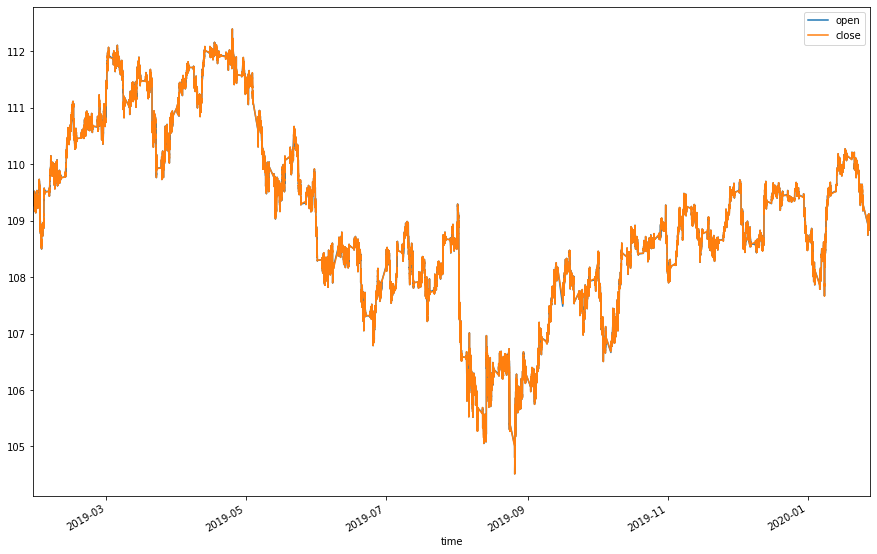

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('20190128_090000_20200128_093300_M1.csv', index_col='time', parse_dates=True)
df.drop(columns=['complete'],inplace=True)
df.plot(y=['open','close'],figsize=(15,10));

In [1]:
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

C:\Users\Seiya\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
df

,open,high,low,close,amount
time,,,,,
2019-01-28 09:00:00,109.416,109.430,109.382,109.412,45.0
2019-01-28 09:01:00,109.414,109.428,109.400,109.428,23.0
2019-01-28 09:02:00,109.426,109.426,109.396,109.419,30.0
2019-01-28 09:03:00,109.422,109.424,109.420,109.424,10.0
2019-01-28 09:04:00,109.422,109.424,109.414,109.419,8.0
...,...,...,...,...,...
2020-01-28 09:29:00,108.942,108.947,108.941,108.947,11.0
2020-01-28 09:30:00,108.946,108.953,108.946,108.950,29.0
2020-01-28 09:31:00,108.948,108.956,108.948,108.948,21.0


In [13]:
df.index

DatetimeIndex(['2019-01-28 09:00:00', '2019-01-28 09:01:00',
               '2019-01-28 09:02:00', '2019-01-28 09:03:00',
               '2019-01-28 09:04:00', '2019-01-28 09:05:00',
               '2019-01-28 09:06:00', '2019-01-28 09:07:00',
               '2019-01-28 09:08:00', '2019-01-28 09:09:00',
               ...
               '2020-01-28 09:24:00', '2020-01-28 09:25:00',
               '2020-01-28 09:26:00', '2020-01-28 09:27:00',
               '2020-01-28 09:28:00', '2020-01-28 09:29:00',
               '2020-01-28 09:30:00', '2020-01-28 09:31:00',
               '2020-01-28 09:32:00', '2020-01-28 09:33:00'],
              dtype='datetime64[ns]', name='time', length=347043, freq=None)

In [17]:
df.index = pd.date_range(start='2019-01-28 09:00:00',freq='T',periods=347043)
df.index

DatetimeIndex(['2019-01-28 09:00:00', '2019-01-28 09:01:00',
               '2019-01-28 09:02:00', '2019-01-28 09:03:00',
               '2019-01-28 09:04:00', '2019-01-28 09:05:00',
               '2019-01-28 09:06:00', '2019-01-28 09:07:00',
               '2019-01-28 09:08:00', '2019-01-28 09:09:00',
               ...
               '2019-09-26 08:53:00', '2019-09-26 08:54:00',
               '2019-09-26 08:55:00', '2019-09-26 08:56:00',
               '2019-09-26 08:57:00', '2019-09-26 08:58:00',
               '2019-09-26 08:59:00', '2019-09-26 09:00:00',
               '2019-09-26 09:01:00', '2019-09-26 09:02:00'],
              dtype='datetime64[ns]', length=347043, freq='T')

In [18]:
temp_df = df[['open']]
labeled_df = temp_df.astype('int', copy=False)
temp_df
#df4.shape

,open
2019-01-28 09:00:00,109.416
2019-01-28 09:01:00,109.414
2019-01-28 09:02:00,109.426
2019-01-28 09:03:00,109.422
2019-01-28 09:04:00,109.422
...,...
2019-09-26 08:58:00,108.942
2019-09-26 08:59:00,108.946
2019-09-26 09:00:00,108.948
2019-09-26 09:01:00,108.948


In [26]:
train_data = temp_df.iloc[:277635] #.loc[:'1940-03-34']
test_data = temp_df.iloc[277635:]
train_data[['open']]

,open
2019-01-28 09:00:00,109.416
2019-01-28 09:01:00,109.414
2019-01-28 09:02:00,109.426
2019-01-28 09:03:00,109.422
2019-01-28 09:04:00,109.422
...,...
2019-08-09 04:10:00,109.146
2019-08-09 04:11:00,109.150
2019-08-09 04:12:00,109.153
2019-08-09 04:13:00,109.156


In [27]:
test_data

,open
2019-08-09 04:15:00,109.144
2019-08-09 04:16:00,109.146
2019-08-09 04:17:00,109.149
2019-08-09 04:18:00,109.152
2019-08-09 04:19:00,109.156
...,...
2019-09-26 08:58:00,108.942
2019-09-26 08:59:00,108.946
2019-09-26 09:00:00,108.948
2019-09-26 09:01:00,108.948


In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
fitted_model = ExponentialSmoothing(train_data['open'],
                                    trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=6).fit()

C:\Users\Seiya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Seiya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:868: RuntimeWarning: overflow encountered in double_scalars
  (gammac * s[i - 1])
C:\Users\Seiya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:867: RuntimeWarning: overflow encountered in double_scalars
  s[i + m - 1] = y_gamma[i - 1] / trended(lvls[i - 1], dampen(b[i - 1], phi)) + \
C:\Users\Seiya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:867: RuntimeWarning: divide by zero encountered in double_scalars
  s[i + m - 1] = y_gamma[i - 1] / trended(lvls[i - 1], dampen(b[i - 1], phi)) + \
C:\Users\Seiya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:865: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
C:\Users\Seiya\Anaconda3\lib\site-packages\st

In [55]:
test_predictions = fitted_model.forecast(69408)

In [56]:
test_predictions

2019-08-09 04:15:00   NaN
2019-08-09 04:16:00   NaN
2019-08-09 04:17:00   NaN
2019-08-09 04:18:00   NaN
2019-08-09 04:19:00   NaN
                       ..
2019-09-26 08:58:00   NaN
2019-09-26 08:59:00   NaN
2019-09-26 09:00:00   NaN
2019-09-26 09:01:00   NaN
2019-09-26 09:02:00   NaN
Freq: T, Length: 69408, dtype: float64

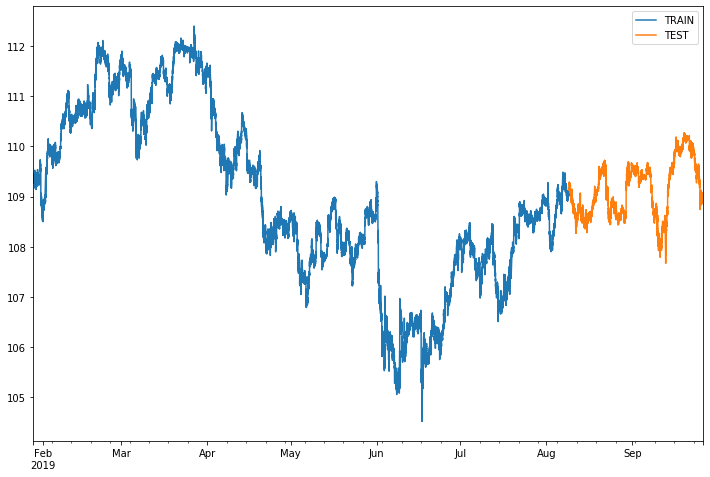

In [57]:
train_data['open'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['open'].plot(legend=True,label='TEST')

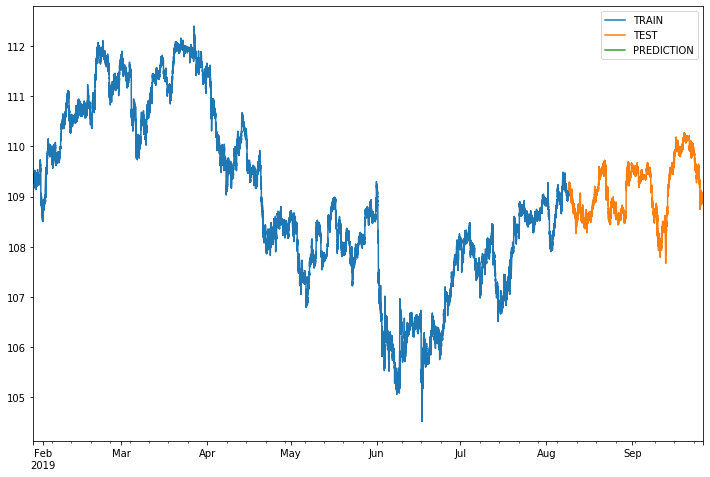

In [58]:
train_data['open'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['open'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
test_data.describe()

,open
count,69408.000000
mean,109.148738
std,0.551277
min,107.668000
25%,108.662000
50%,109.141000
75%,109.550000
max,110.275000


In [61]:
mean_absolute_error(test_data,test_predictions)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mean_squared_error(test_data,test_predictions)

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

In [ ]:
final_model = ExponentialSmoothing(df['open'],trend='mul',seasonal='mul',seasonal_periods=2).fit()

In [ ]:
forecast_predictions = final_model.forecast(69408)

In [ ]:
df['open'].plot(figsize=(12,8))
forecast_predictions.plot()

In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
df['open'] - df['open'].shift(1)

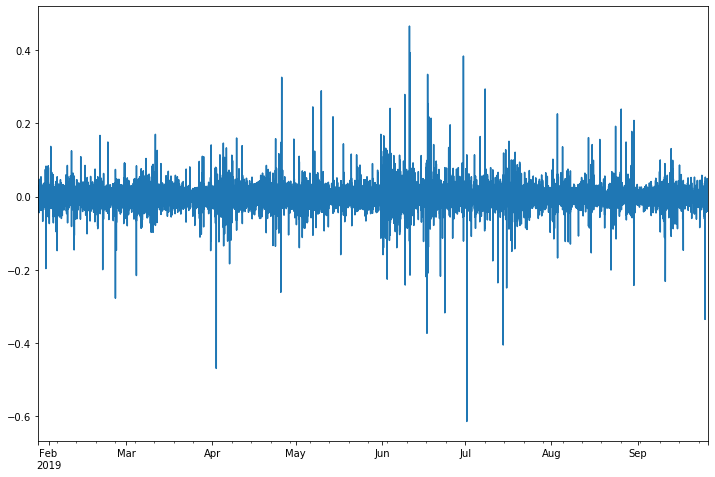

In [53]:
diff(df['open'],k_diff=1).plot(figsize=(12,8))